# Using the K-NN algorithm for classification of iris

In this assigment, you will classify if an Iris is 'Iris Setosa' or 'Iris Versicolour' or 'Iris Virginica' using the k nearest neighbor algorithm.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.  Please download the dataset before running the code below. 

## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [302]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library
df = pd.read_csv('/content/sample_data/iris.data', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width[cm]", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width[cm],label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocesssing
It would be more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.  This way our code can always work with numerical values instead of strings.

In [303]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width[cm],label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [304]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width[cm]"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## visualizing the data set

We will look plot the points using only two of the features

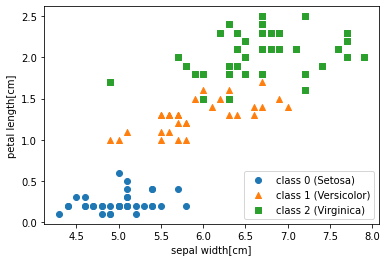

In [305]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()

# Your code goes here

In [306]:
print(X_train.shape)

(112, 2)


In [307]:
from math import sqrt

In [308]:

def euclidean_distance(train, test_sample):
  #### TO-DO #####      
    distances = [sqrt(np.sum((x - test_sample)**2)) for x in train]
    distances = np.asarray(distances)
    #print("distacnes",distances)
    return  distances
  ##############

In [309]:
def  manhattan_distance(train, test_sample):
  distances = [np.sum(abs(x-test_sample)) for x in train]
  distances = np.asarray(distances)
  return distances

In [310]:
def get_neighbors( xtrain, ytrain, xtest, k, dist_func):
  #### TO-DO #####  
  neighbors = np.zeros((1,k),int)
  for i in range(xtest.shape[0]):
      distances = dist_func(xtrain,xtest[i])
      index_sort = np.argsort(distances)
      knn_index = index_sort[0:k]
      #print(knn_index)
      neighborClass = [ytrain[i] for i in knn_index]
      #print(neighborClass)
      neighbors = np.vstack((neighbors, neighborClass))
  neighbors = np.delete(neighbors,0,0)
  ##############
  return neighbors

In [311]:
from collections import Counter

In [312]:
def predict(Xtest, neighbors):
  result=[]
  for i in range(Xtest.shape[0]):
    count_neighbortype = Counter(neighbors[i])
    predict_i = count_neighbortype.most_common(1)[0][0]
    result.append(predict_i)
  pre_result = np.asarray(result)
  return pre_result

In [313]:
def check_result(ypredict,ytest):
  correct=0
  incorrect=0
  incorrect_list=[]
  for i in range(ytest.shape[0]):
    if ypredict[i]!=ytest[i]:
      incorrect=incorrect+1
      incorrect_list.append(i)
    else:
      correct=correct+1
  #incorrect_list = np.asarray(incorrect_list)
  accuracy=correct/(incorrect+correct)
  return incorrect_list,accuracy

In [314]:
label=['Iris-setosa',
              'Iris-versicolor',
              'Iris-virginica']

In [315]:
#eulidean ditance k=1,3,5
for k in [1,3,5]:
    all_neighbors = get_neighbors(X_train,y_train,X_test,k,euclidean_distance)
    pre_result = predict(X_test,all_neighbors)
    incorrect_list,acc = check_result(pre_result,y_test)
    output = [label[i] for i in pre_result]
    print("k=",k)
    print("index of examples are not correctly classified:",incorrect_list)
    print("accuracy:",acc)
    print(output)


k= 1
index of examples are not correctly classified: [10, 16]
accuracy: 0.9473684210526315
['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor']
k= 3
index of examples are not correctly classified: [10]
accuracy: 0.9736842105263158
['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Ir

In [316]:
#zero_R
vote = Counter(y_test)
num = y_test.shape[0]
majority = vote.most_common(1)[0][1]
zero_R_acc = majority/num
print("accuracy of zero_R:",zero_R_acc)

accuracy of zero_R: 0.42105263157894735


In [317]:
#mahattan distance k=1,3,5
for k in [1,3,5]:
    all_neighbors = get_neighbors(X_train,y_train,X_test,k,manhattan_distance)
    #print(all_neighbors)
    pre_result = predict(X_test,all_neighbors)
    incorrect_list,acc = check_result(pre_result,y_test)
    output = [label[i] for i in pre_result]
    print("k=",k)
    print("index of examples are not correctly classified:",incorrect_list)
    print("accuracy:",acc)
    print(output)

k= 1
index of examples are not correctly classified: [10, 16]
accuracy: 0.9473684210526315
['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor']
k= 3
index of examples are not correctly classified: [10]
accuracy: 0.9736842105263158
['Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Ir

In [320]:
#5-fold cross-validation
for k in [3,5,7]:
  total_acc=0
  print("k=",k)
  for n in range(0,5):
    new_x = np.array_split(X_train, 5)
    new_y = np.array_split(y_train, 5)
    vx_train = np.vstack((new_x[i] for i in range(0,5) if i != n))
    vy_train = np.hstack((new_y[i] for i in range(0,5) if i != n))
    vx_test = new_x[n]
    vy_test = new_y[n]

    vx_neighbors = get_neighbors(vx_train,vy_train,vx_test,k,euclidean_distance)
    pre_result = predict(vx_test,vx_neighbors)
    incorrect_list,acc = check_result(pre_result,vy_test)
    print("acc of",n,"is:",acc)
    total_acc=total_acc+acc
  
  print("accuracy:",total_acc/5)



k= 3
acc of 0 is: 0.8260869565217391
acc of 1 is: 1.0
acc of 2 is: 0.9545454545454546
acc of 3 is: 0.9545454545454546
acc of 4 is: 0.9090909090909091
accuracy: 0.9288537549407115
k= 5
acc of 0 is: 0.8695652173913043
acc of 1 is: 1.0
acc of 2 is: 0.9545454545454546
acc of 3 is: 1.0
acc of 4 is: 0.9545454545454546
accuracy: 0.9557312252964426
k= 7
acc of 0 is: 0.8695652173913043
acc of 1 is: 1.0
acc of 2 is: 1.0
acc of 3 is: 1.0
acc of 4 is: 0.9090909090909091
accuracy: 0.9557312252964426


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':
